In [1]:
import json
import os
import re
import cv2
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import imutils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#go into the results/images folder and extract the numbers for each file name and put them in a list

import os
import re

im_name = "bET-CALR"

#go into the results/images folder and extract the numbers for each file name and put them in a list
def get_image_numbers(file_path, im_name):
    image_numbers = []
    for filename in os.listdir(file_path):
        if filename.startswith(im_name):
            #remove im_name from the filename
            filename = filename.replace(im_name, "")
            image_numbers.append(int(re.search(r'\d+', filename).group()))
    return image_numbers

results_path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/cycleGAN_intermediates/bET-CALR-epoch057/train/test_images"
numbers = get_image_numbers(file_path=results_path, im_name=im_name)

In [4]:
numbers = list(set(numbers))
numbers.sort()

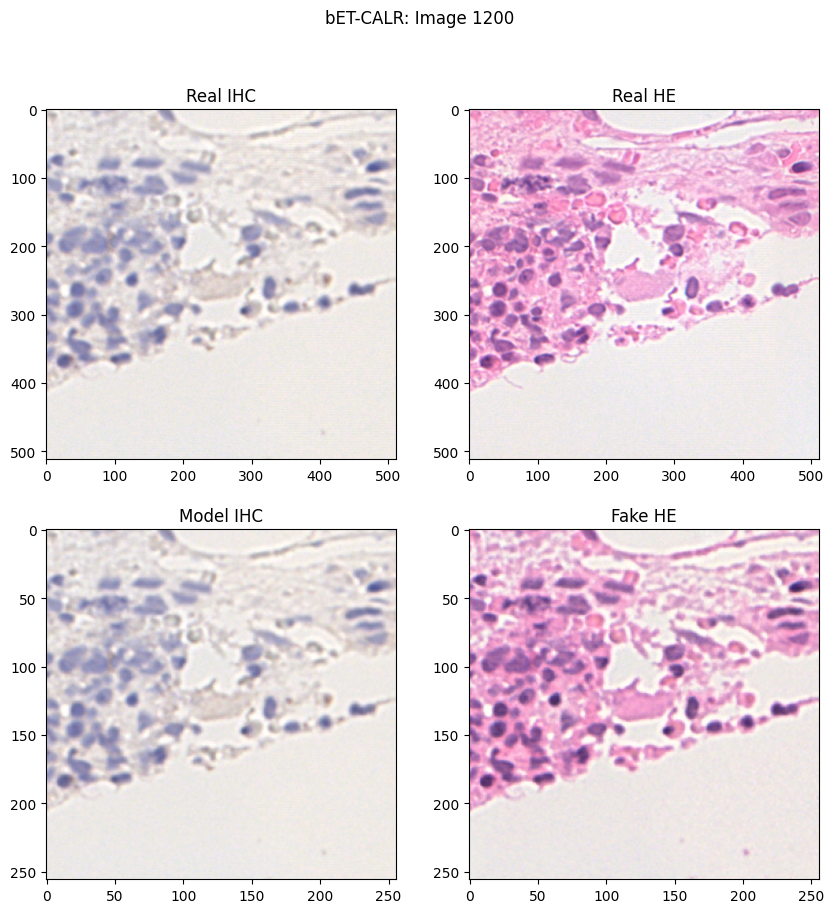

In [28]:
import cv2
import numpy as np


num = numbers[47]

#load the images

real_ihc_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/bET-CALR/ihc_img/"
real_he_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/bET-CALR/he_img/"
results_folder = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/cycleGAN_intermediates/bET-CALR-epoch057/train/test_images/"

real_ihc = cv2.imread(real_ihc_folder + "{}_{}.png".format(im_name, num))
real_he = cv2.imread(real_he_folder + "{}_{}.png".format(im_name, num))
fake_he = cv2.imread(results_folder + "{}_{}_fake.png".format(im_name, num))
model_ihc = cv2.imread(results_folder + "{}_{}_real.png".format(im_name, num))

#plot the images as subplots

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(real_ihc)
ax[0,0].set_title("Real IHC")
ax[0,1].imshow(real_he)
ax[0,1].set_title("Real HE")
ax[1,0].imshow(model_ihc)
ax[1,0].set_title("Model IHC")
ax[1,1].imshow(fake_he)
ax[1,1].set_title("Fake HE")

#add the title to subplots
fig.suptitle("{}: Image {}".format(im_name, num))


#show the plot
plt.show()

In [13]:
#now for each patient I want t get the SSIM score for each image

from skimage.metrics import structural_similarity as compare_ssim
import cv2
import imutils

dict_ssim = {}

for num in numbers:

    imageA = cv2.imread(real_he_folder + "{}_{}.png".format(im_name, num))
    imageB = cv2.imread(results_folder + "{}_{}_fake.png".format(im_name, num))

    #resize the images to 256x256

    imageA = cv2.resize(imageA, (256, 256))

    # convert the images to grayscale

    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # #show gray scale images

    # fig, ax = plt.subplots(1,2, figsize=(10,10))
    # ax[0].imshow(grayA, cmap="gray")
    # ax[0].set_title("Real HE")
    # ax[1].imshow(grayB, cmap="gray")
    # ax[1].set_title("Fake HE")

    # #show the plot
    # plt.show()

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    image = im_name + "_" + str(num)
    dict_ssim[image] = score

In [17]:
dict_ssim

{'bET-CALR_1': 0.5549008957839919,
 'bET-CALR_111': 0.8118310226725997,
 'bET-CALR_112': 0.7900384490994325,
 'bET-CALR_1001': 0.8084887115884108,
 'bET-CALR_1002': 0.7653695222696432,
 'bET-CALR_1003': 0.8342200890617202,
 'bET-CALR_1013': 0.6733574104286472,
 'bET-CALR_1021': 0.6176947076107057,
 'bET-CALR_1031': 0.17294781218864652,
 'bET-CALR_1034': 0.7855407280975366,
 'bET-CALR_1036': 0.8023041198888312,
 'bET-CALR_1038': 0.7343228739633646,
 'bET-CALR_1041': 0.521667993028421,
 'bET-CALR_1047': 0.3231167985800425,
 'bET-CALR_1055': 0.7540292514022358,
 'bET-CALR_1056': 0.7736015277367545,
 'bET-CALR_1057': 0.3363074655315447,
 'bET-CALR_1063': 0.7288688377236237,
 'bET-CALR_1066': 0.3052717398653506,
 'bET-CALR_1071': 0.6326748296417183,
 'bET-CALR_1072': 0.7571287207352029,
 'bET-CALR_1075': 0.14773574501619288,
 'bET-CALR_1077': 0.6917921613122366,
 'bET-CALR_1082': 0.6929165799183515,
 'bET-CALR_1087': 0.7428648714114,
 'bET-CALR_1091': 0.6332831643346631,
 'bET-CALR_1107': 0

In [21]:
#save dict_ssim as json file

dict_path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/cycleGAN_intermediates/bET-CALR-epoch057/train"

with open(os.path.join(dict_path, '09062022_epoch057_bETCALR_ssim_scores.json'), 'w') as fp:
    json.dump(dict_ssim, fp)

In [22]:
dict_path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/cycleGAN_intermediates/bET-CALR-epoch057/train"

with open(os.path.join(dict_path, '09062022_epoch057_bETCALR_ssim_scores.json'), 'r') as fp:
    dict = json.load(fp)

/tmp/ipykernel_7770/117462247.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(dict.values()), hist = False, kde = True,


Text(0, 0.5, 'Density')

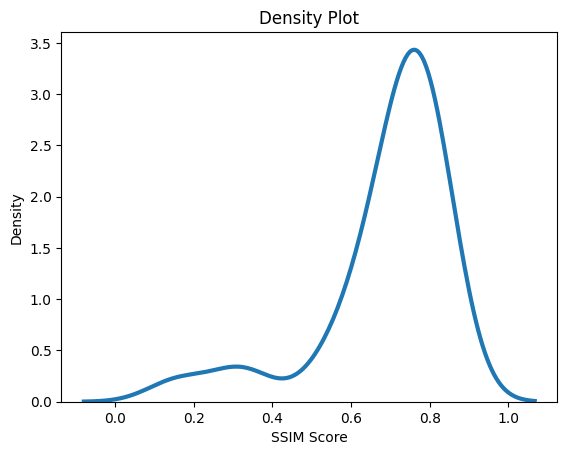

In [25]:
#plot values as a histogram

import seaborn as sns

sns.distplot(list(dict.values()), hist = False, kde = True,
                 kde_kws = {'linewidth': 3})

plt.title('Density Plot')
plt.xlabel('SSIM Score')
plt.ylabel('Density')
